In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/235.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ZmgIf2ljORukVGbbnzrY")
project = rf.workspace("college-if44x").project("on-tree-mature-coconut-fruit-detection")
version = project.version(1)
dataset = version.download("yolov8")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to On-tree-mature-coconut-fruit-detection-1 in yolov8:: 100%|██████████| 548/548 [00:00<00:00, 4693.02it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
New https://pypi.org/project/ultralytics/8.2.77 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/On-tree-mature-coconut-fruit-detection-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, l

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	train_batch1.jpg
confusion_matrix_normalized.png			    R_curve.png		train_batch2.jpg
confusion_matrix.png				    results.csv		val_batch0_labels.jpg
events.out.tfevents.1723721960.69266af0c355.3394.0  results.png		val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch180.jpg	val_batch1_pred.jpg
labels.jpg					    train_batch181.jpg	weights
P_curve.png					    train_batch182.jpg


/content


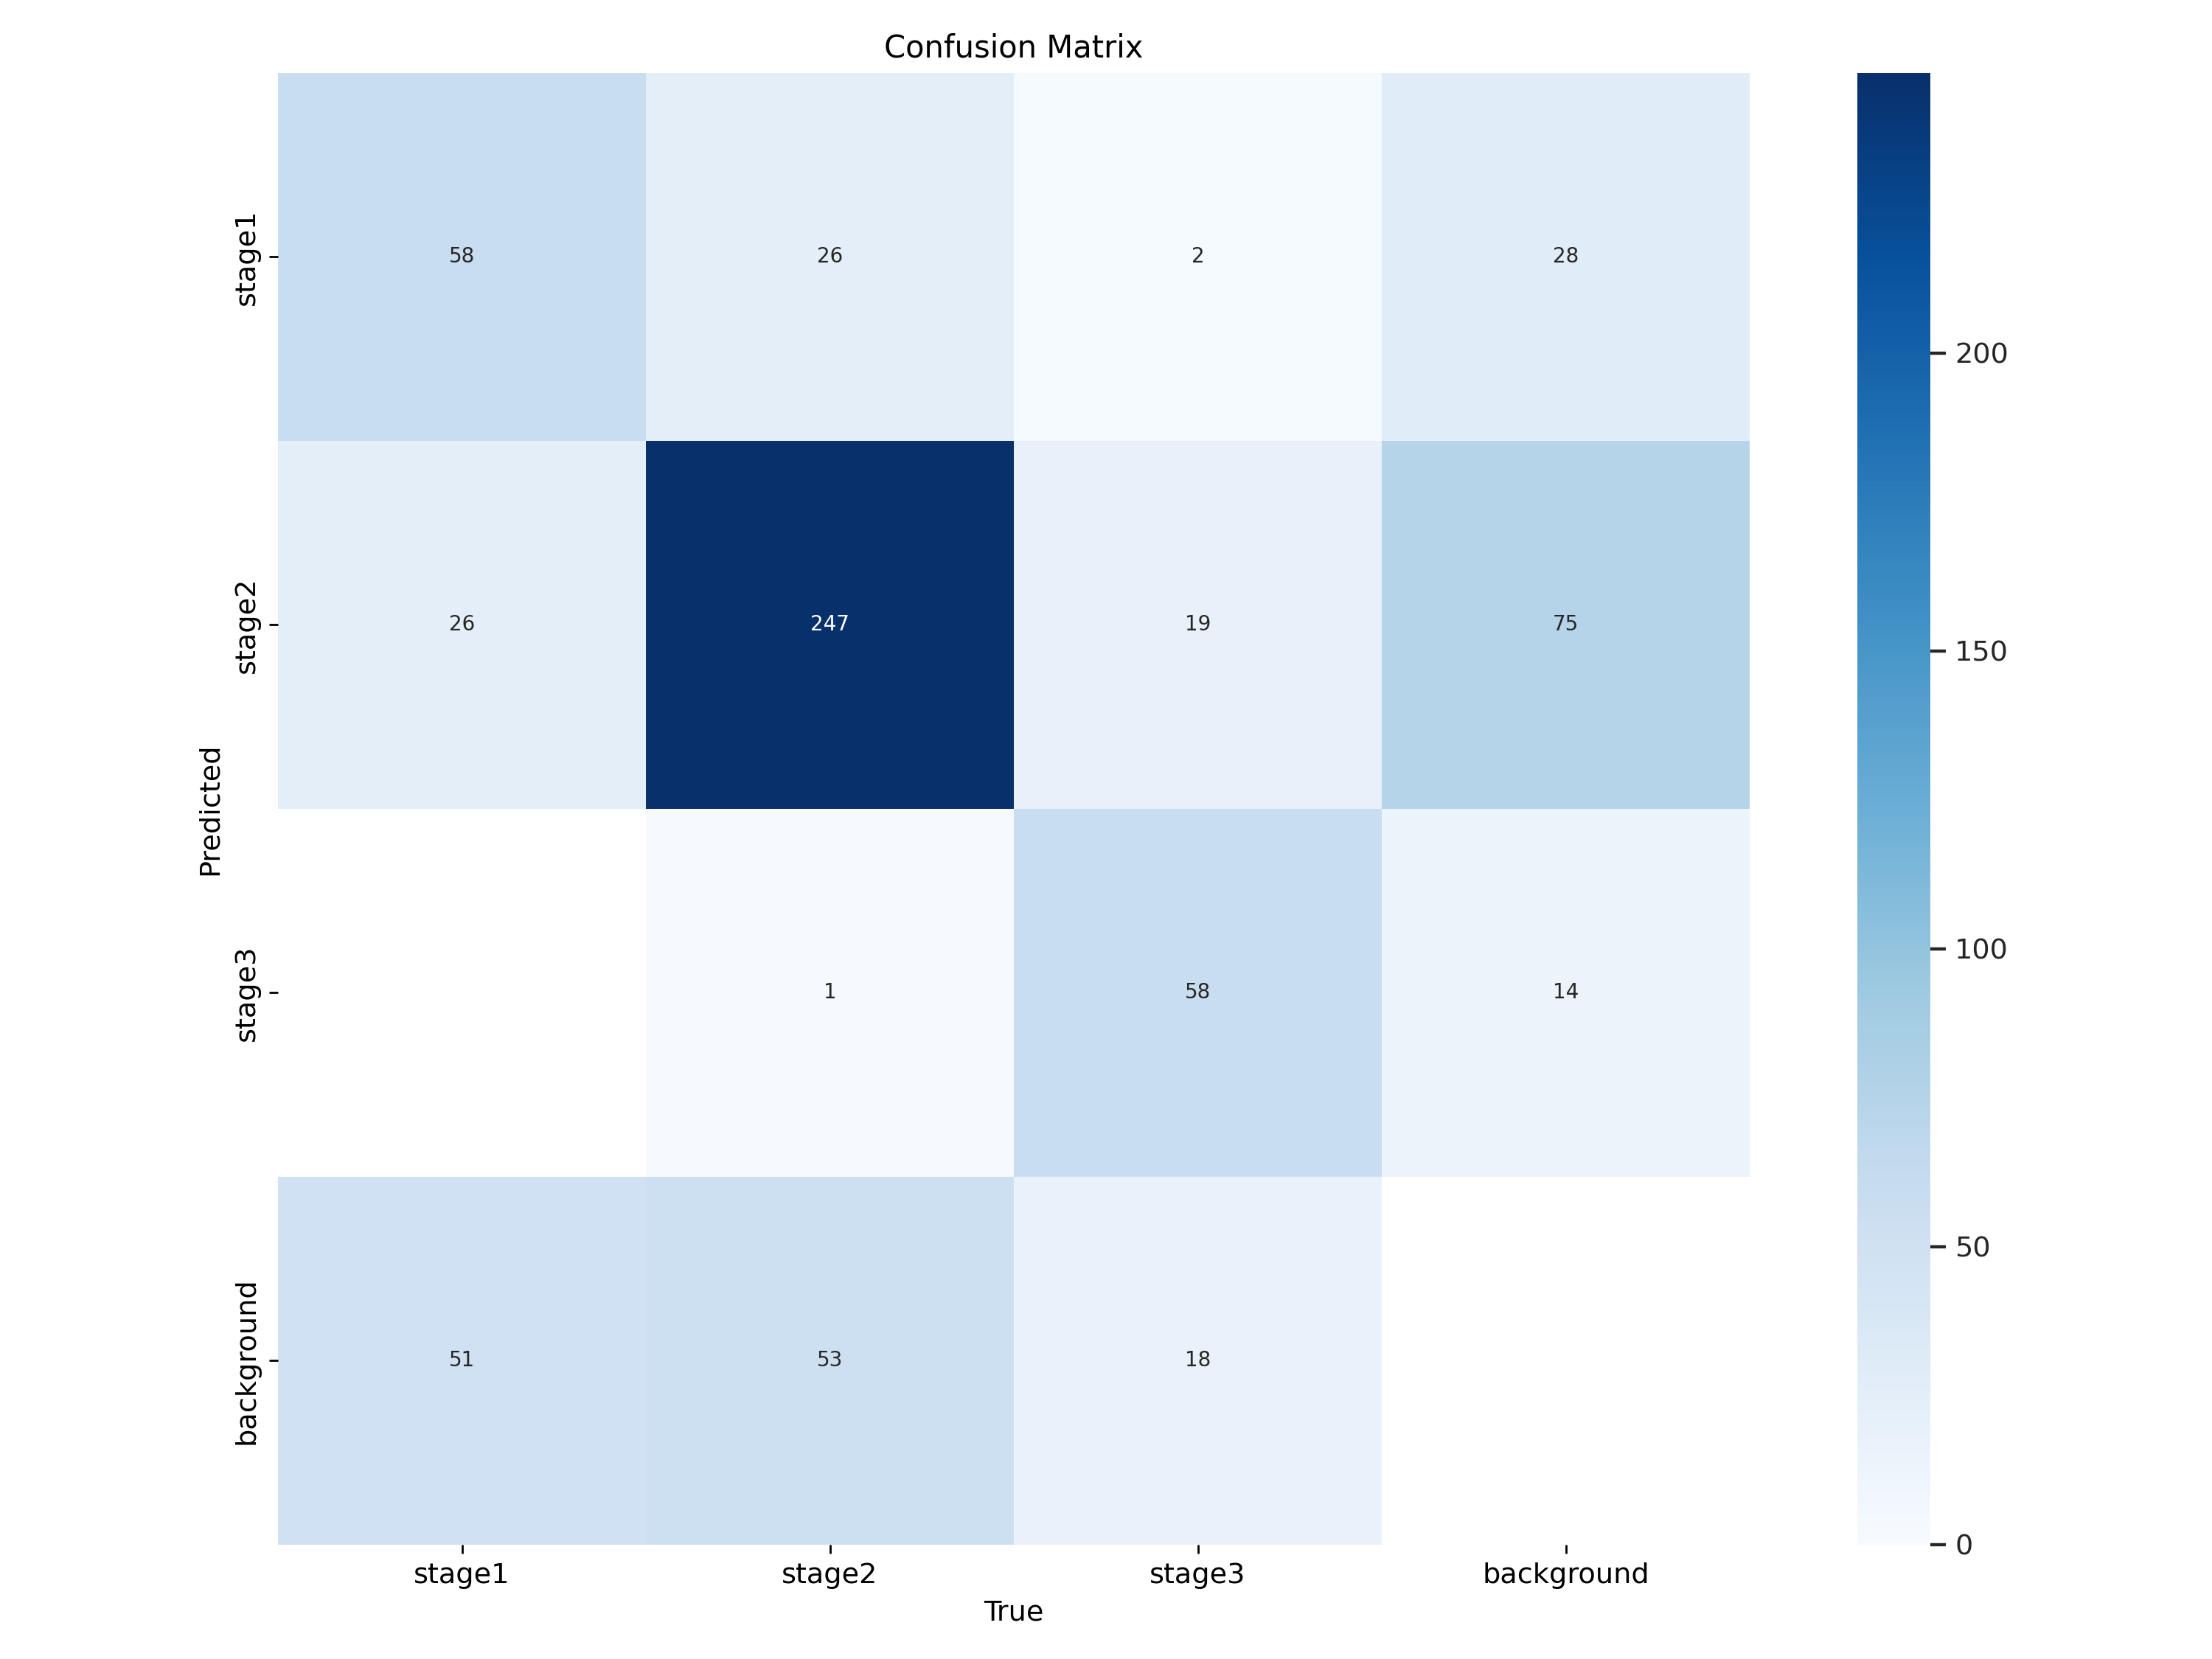

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


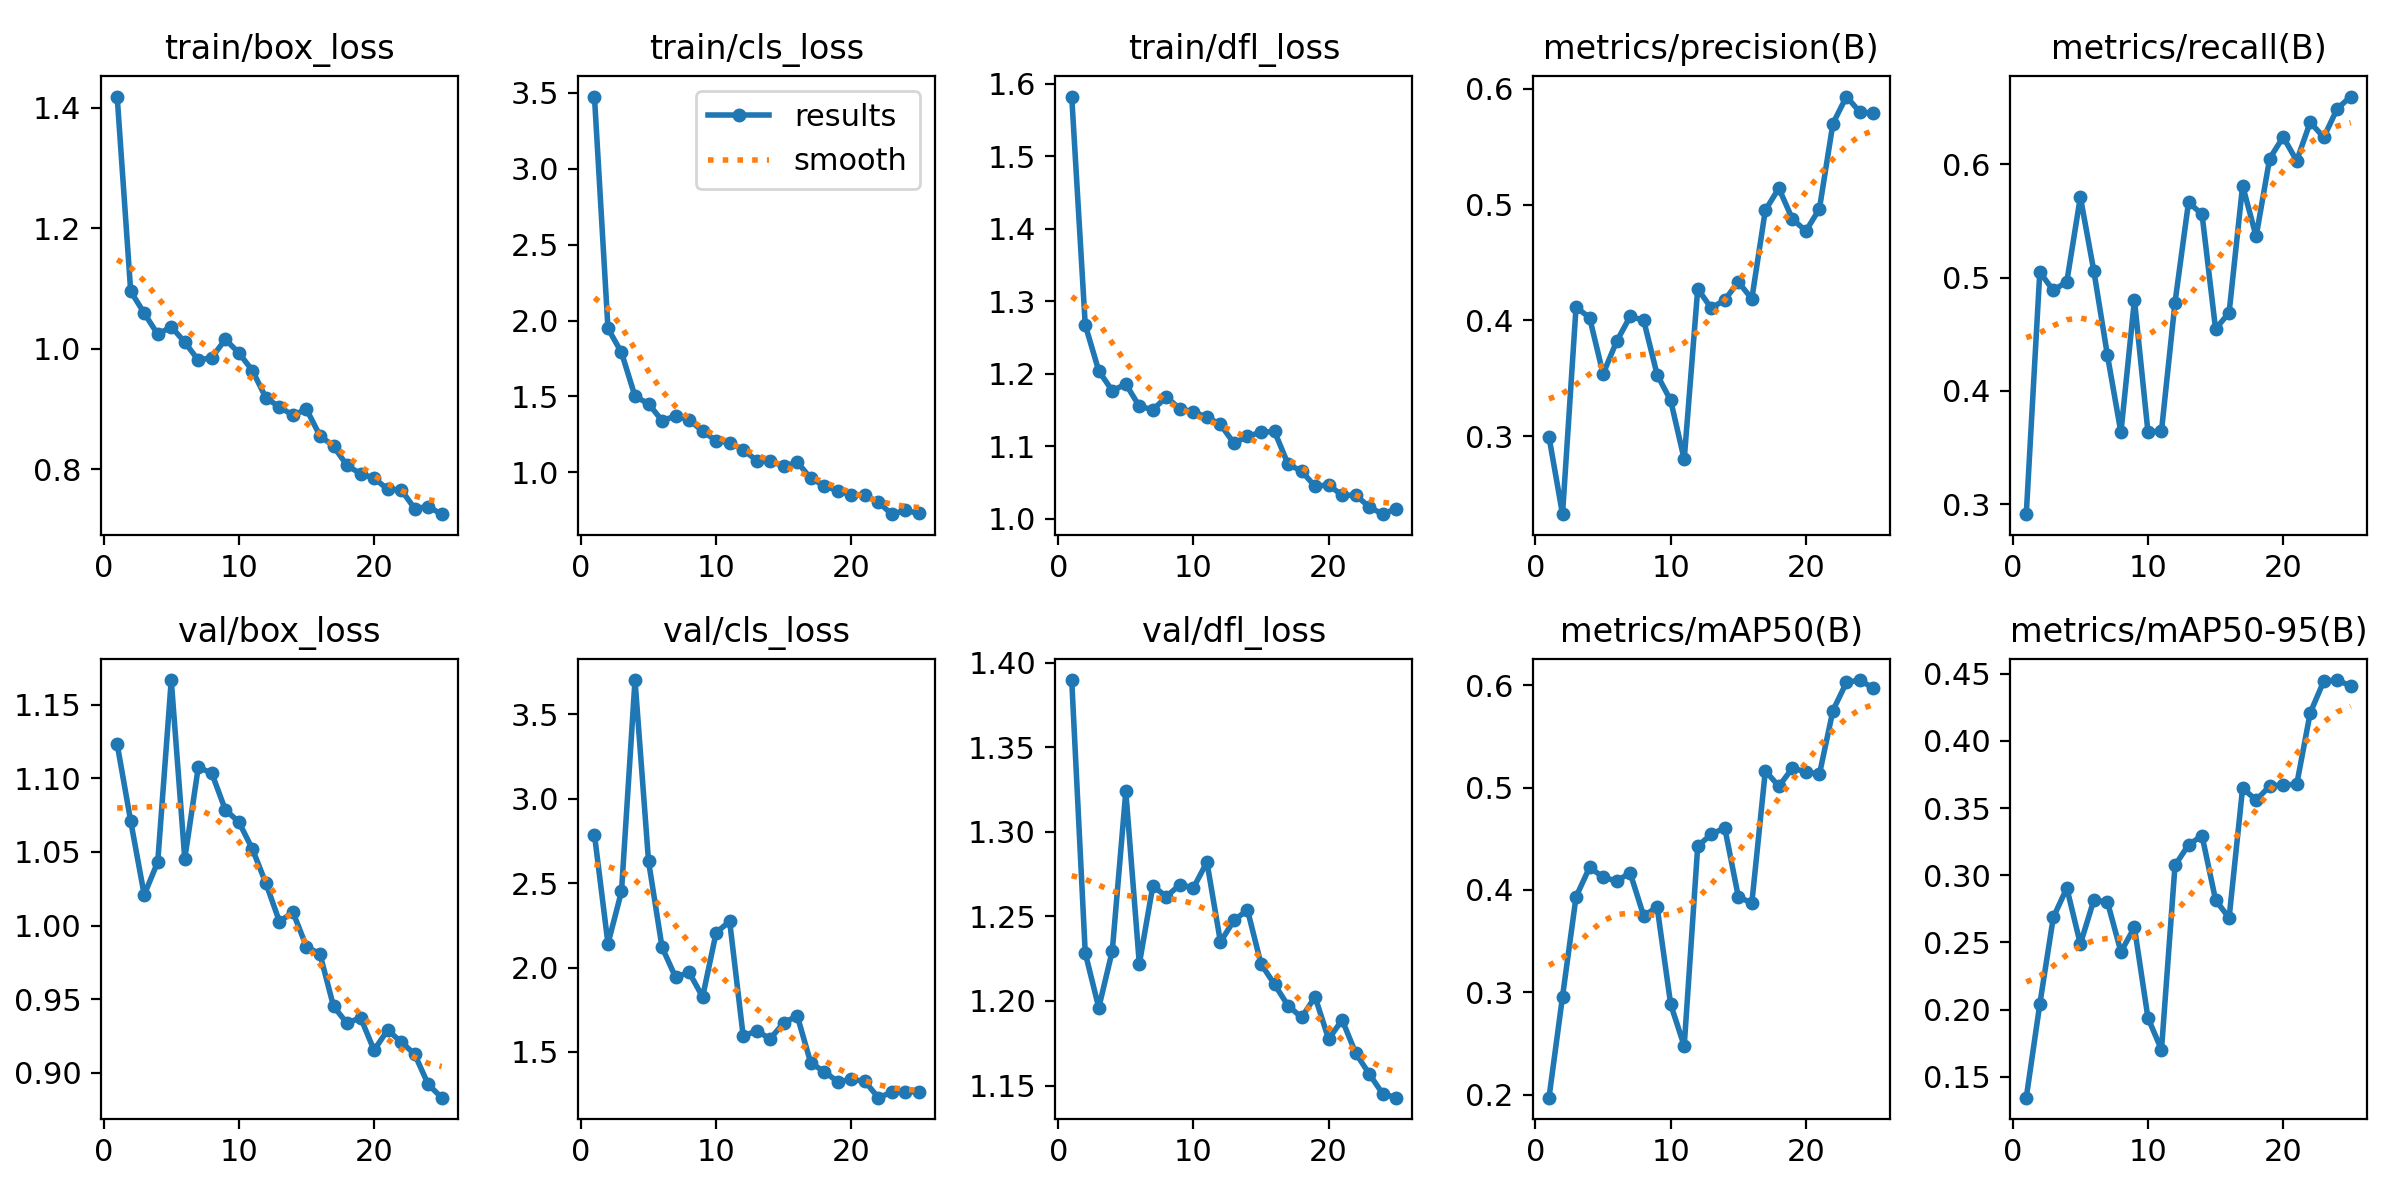

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


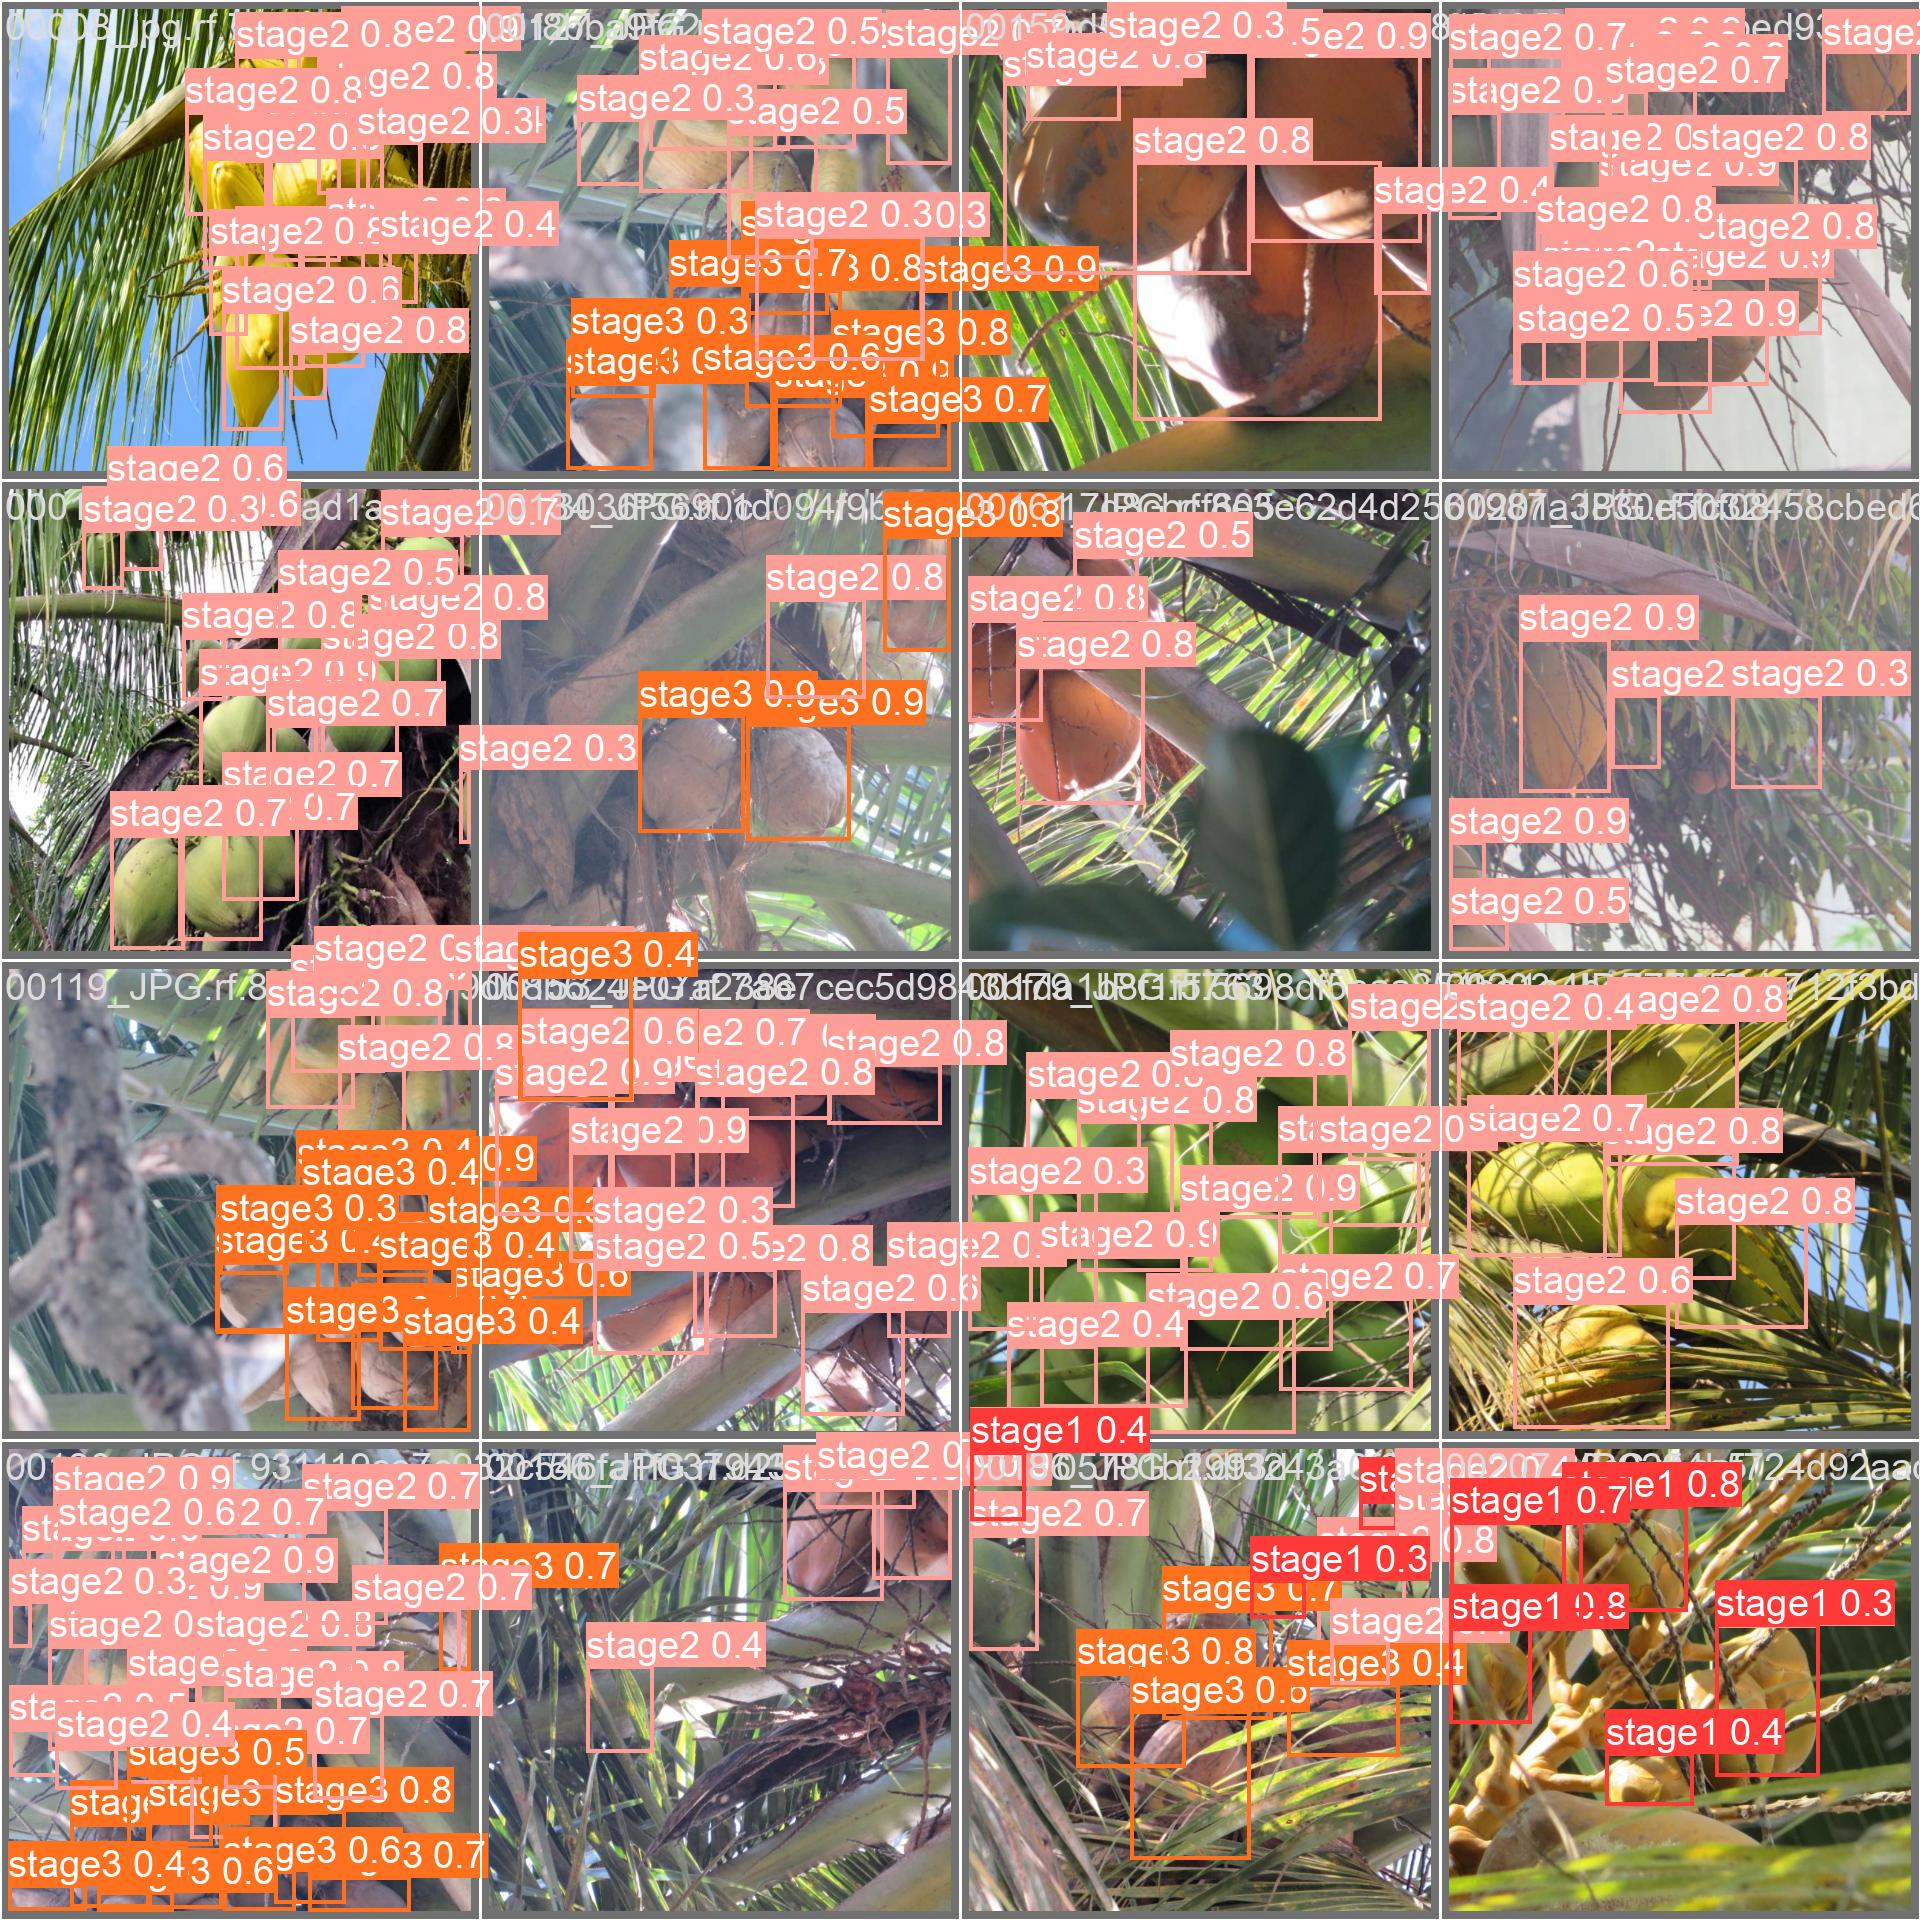

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/On-tree-mature-coconut-fruit-detection-1/valid/labels.cache... 53 images, 2 backgrounds, 0 corrupt: 100% 53/53 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:09<00:00,  2.28s/it]
                   all         53        559      0.561      0.685      0.606      0.447
                stage1         53        135      0.435      0.541      0.388      0.279
                stage2         53        327      0.568      0.809      0.743       0.58
                stage3         53         97      0.681      0.704      0.687      0.482
Speed: 19.7ms preprocess, 37.2ms inference, 0.0ms loss, 15.8ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/28 /content/datasets/On-tree-mature-coconut-fruit-detection-1/test/images/00003_jpg.rf.685ee7b127bd0896095d95bc5b656151.jpg: 800x800 6 stage2s, 22.4ms
image 2/28 /content/datasets/On-tree-mature-coconut-fruit-detection-1/test/images/00011_jpg.rf.b959217cc39f290e6ec84f3187dd4959.jpg: 800x800 8 stage2s, 1 stage3, 22.5ms
image 3/28 /content/datasets/On-tree-mature-coconut-fruit-detection-1/test/images/00118_JPG.rf.c865049fcc80421b09821291ea49eca1.jpg: 800x800 1 stage1, 3 stage2s, 13 stage3s, 22.4ms
image 4/28 /content/datasets/On-tree-mature-coconut-fruit-detection-1/test/images/00141_JPG.rf.662e9406ebdd8691a54bbbd9799131fb.jpg: 800x800 5 stage2s, 1 stage3, 22.4ms
image 5/28 /content/datasets/On-tree-mature-coconut-fruit-detection-1/test/images/00147_JPG.rf.031898

**NOTE:** Let's take a look at few results.